In [63]:
#Instalacion de librerias necesarias
!pip install pandas
!pip install sqlite3
!pip install matplotlib
!pip install numpy

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [64]:
#Importamos librerias necesarias
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

#Conexion con la base de datos 
conn = sqlite3.connect('travel copy.sqlite')

In [65]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

sillas = "SELECT a.aircraft_code AS 'CodigodeAvion', SUM(CASE WHEN s.fare_conditions = 'Economy' THEN 1 ELSE 0 END) AS 'Economy', SUM(CASE WHEN s.fare_conditions = 'Business' THEN 1 ELSE 0 END) AS 'Business', SUM(CASE WHEN s.fare_conditions = 'Comfort' THEN 1 ELSE 0 END) AS 'Comfort' FROM aircrafts_data a LEFT JOIN seats s ON a.aircraft_code = s.aircraft_code GROUP BY a.aircraft_code ORDER BY SUM(CASE WHEN s.fare_conditions = 'Economy' THEN 1 ELSE 0 END) DESC;"

df_sillas = pd.read_sql_query(sql = sillas, con = conn)
df_sillas

,CodigodeAvion,Economy,Business,Comfort
0,773,324,30,48
1,763,192,30,0
2,321,142,28,0
3,320,120,20,0
4,733,118,12,0
5,319,96,20,0
6,SU9,85,12,0
7,CR2,50,0,0
8,CN1,12,0,0


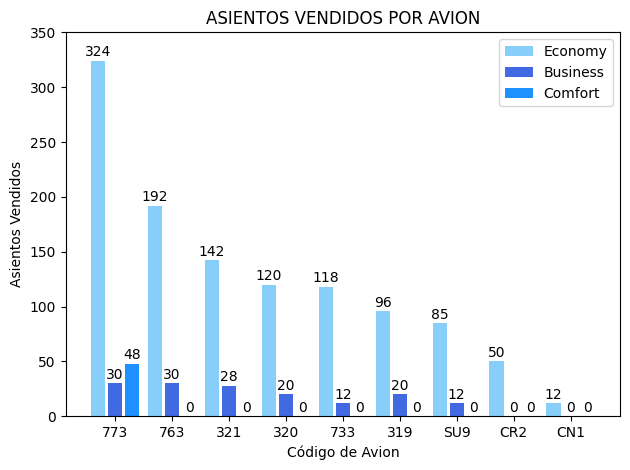

In [68]:
#definir variables

labels = df_sillas.CodigodeAvion
Economy = df_sillas.Economy
Business = df_sillas.Business
Comfort = df_sillas.Comfort

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
barra1 = ax.bar(x-0.30, Economy, width, label='Economy', color='#87CEFA')
barra2 = ax.bar(x, Business, width, label='Business', color='#4169E1')
barra3 = ax.bar(x+0.30, Comfort, width, label='Comfort', color='#1E90FF')

ax.set_ylabel('Asientos Vendidos')
ax.set_xlabel('Código de Avion')
ax.set_title('ASIENTOS VENDIDOS POR AVION')
ax.set_xticks(x, labels)

ax.legend()

ax.bar_label(barra1, padding=1)
ax.bar_label(barra2, padding=1)
ax.bar_label(barra3, padding=1)

ax.set_ylim(0,350)
fig.tight_layout()

plt.show()